# 🔍 Find Visually Similar Images with Pandas and OpenCV 📸

## ❓ Did you know you can find similar images using Pandas? 🧐

👉 Today, I'll show you how to use `cv2.compareHist()` to analyze image histograms and detect similarities.

## 🔧 How does it work?
📊 An image histogram represents the color distribution. By comparing histograms with OpenCV, we can measure image similarity.

## 🔎 Why does it matter?
✅ Detect duplicate images in databases.  
✅ Improve visual recommendation systems.  
✅ Optimize similarity searches in e-commerce and social media.  

## ✨ Real-world example:
Imagine you have thousands of images in a database and need to find duplicates or suggest similar content in an e-commerce platform. With this technique, you can compare histograms and classify images based on similarity.

## ⚙️ Business impact:
🚀 Reduce storage by eliminating duplicate images.  
🎯 Improve accuracy in visual recommendations.  
📈 Optimize product catalogs in online stores.  

## 📊 Code summary:
- 🔹 Load sample images using OpenCV and Pandas.  
- 🔹 Compute histograms for each image.  
- 🔹 Use `cv2.compareHist()` to measure similarity.  
- 🔹 Display results in a visualization.  

💭 **How would you use this technique in your projects? Let me know in the comments!** 👇  

🔑 #DataScience #Python #MachineLearning #ComputerVision #Pandas #ArtificialIntelligence #OpenCV #Ecommerce #Recommendations  

---
# 🔍 Buscar imágenes visualmente similares con Pandas y OpenCV 📸

## ❓ ¿Sabías que puedes encontrar imágenes similares con Pandas? 🧐

👉 Hoy te mostraré cómo usar `cv2.compareHist()` para analizar histogramas de imágenes y detectar similitudes.

## 🔧 ¿Cómo funciona?
📊 Un histograma de imagen es una representación de la distribución de colores. Al comparar histogramas con OpenCV, podemos medir la similitud entre imágenes.

## 🔎 ¿Por qué importa?
✅ Detectar imágenes duplicadas en bases de datos.  
✅ Mejorar sistemas de recomendación visual.  
✅ Optimizar búsquedas por similitud en e-commerce y redes sociales.  

## ✨ Ejemplo real o Caso práctico:
Imagina que tienes miles de imágenes en una base de datos y necesitas encontrar duplicados o sugerir contenido similar en una plataforma de e-commerce. Con esta técnica, puedes comparar histogramas y clasificar imágenes según su similitud.

## ⚙️ Impacto en el negocio:
🚀 Reducción del almacenamiento eliminando imágenes duplicadas.  
🎯 Mejora en la precisión de recomendaciones visuales.  
📈 Optimización de catálogos de imágenes en tiendas en línea.  

## 📊 Resumen del código:
- 🔹 Cargamos imágenes de ejemplo usando OpenCV y Pandas.  
- 🔹 Calculamos histogramas de cada imagen.  
- 🔹 Usamos `cv2.compareHist()` para medir similitudes.  
- 🔹 Mostramos los resultados en un gráfico.  

💭 **¿Cómo usarías esta técnica en tus proyectos? Cuéntame en los comentarios!** 👇  

🔑 #DataScience #Python #MachineLearning #ComputerVision #Pandas #ArtificialIntelligence #OpenCV #Ecommerce #Recomendaciones  

---



C:\Users\jenny\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\jenny\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\jenny\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


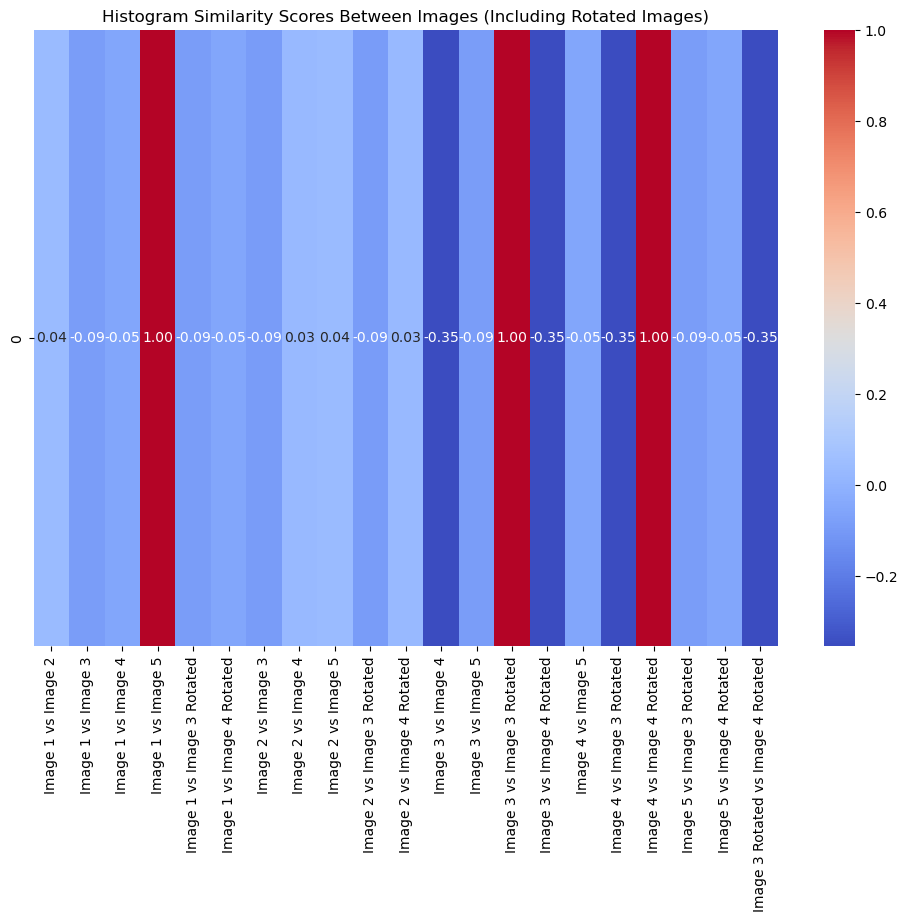

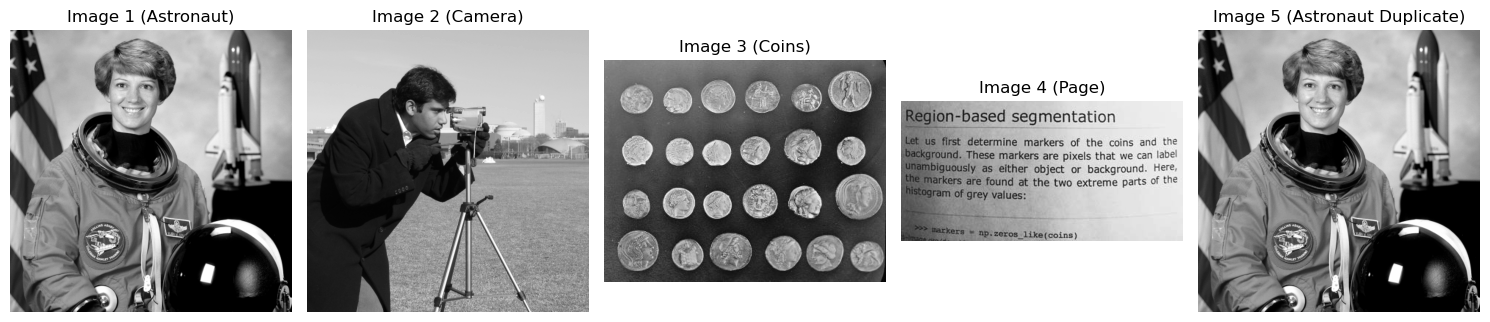

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import data

# Load sample images (these images are already in grayscale)
image1 = cv2.cvtColor(data.astronaut(), cv2.COLOR_RGB2GRAY)  # Convert to grayscale
image2 = data.camera()  # Already grayscale, no conversion needed
image3 = data.coins()  # Already grayscale, no conversion needed
image4 = data.page()  # Already grayscale, no conversion needed

# Create rotated versions of the images
image3_rotated = cv2.rotate(image3, cv2.ROTATE_90_CLOCKWISE)
image4_rotated = cv2.rotate(image4, cv2.ROTATE_90_CLOCKWISE)

# Repeat an image to simulate duplication (e.g., using image1 again)
image5 = image1  # Duplicate of image1 to simulate a repeated image

# Function to compute histograms
def compute_histogram(image):
    """Computes a normalized histogram for a given image."""
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    cv2.normalize(hist, hist)
    return hist

# Compute histograms for all images
hist1 = compute_histogram(image1)
hist2 = compute_histogram(image2)
hist3 = compute_histogram(image3)
hist4 = compute_histogram(image4)
hist5 = compute_histogram(image5)
hist3_rotated = compute_histogram(image3_rotated)
hist4_rotated = compute_histogram(image4_rotated)

# List of images and their rotated counterparts
images = {
    "Image 1": hist1,
    "Image 2": hist2,
    "Image 3": hist3,
    "Image 4": hist4,
    "Image 5": hist5,
    "Image 3 Rotated": hist3_rotated,
    "Image 4 Rotated": hist4_rotated
}

# Initialize an empty dictionary to store similarity scores
similarities = {}

# Loop over the images and compare each unique pair
for i, (image_name1, hist1) in enumerate(images.items()):
    for j, (image_name2, hist2) in enumerate(images.items()):
        if i < j:  # Compare each unique pair (avoid duplication)
            similarity_score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
            similarities[f"{image_name1} vs {image_name2}"] = similarity_score

# Convert the similarities dictionary into a DataFrame for easier visualization
df = pd.DataFrame([similarities])

# Plot similarity scores using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Histogram Similarity Scores Between Images (Including Rotated Images)")
plt.show()

# Display the images for visual comparison
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Image 1 (Astronaut)")
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Image 2 (Camera)")
axes[1].axis('off')

axes[2].imshow(image3, cmap='gray')
axes[2].set_title("Image 3 (Coins)")
axes[2].axis('off')

axes[3].imshow(image4, cmap='gray')
axes[3].set_title("Image 4 (Page)")
axes[3].axis('off')

axes[4].imshow(image5, cmap='gray')
axes[4].set_title("Image 5 (Astronaut Duplicate)")
axes[4].axis('off')

plt.tight_layout()
plt.show()
